In [15]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [16]:
zch_stats_file_folder = "/home/lizhouyu/oss_github/torchrec/torchrec/distributed/benchmark/result_tbsize_1000_zch"
zch_stats_file_path = os.path.join(zch_stats_file_folder, 'zch_metrics.csv')
df_zch_stats = pd.read_csv(zch_stats_file_path)
print(df_zch_stats.head())

   epoch_idx  ...                                rank_total_cnt
0          0  ...   {"3": 9170, "1": 757, "2": 2643, "0": 3814}
1          0  ...  {"3": 5285, "1": 2972, "2": 2369, "0": 5758}
2          0  ...  {"3": 4258, "1": 4099, "2": 3749, "0": 4278}
3          0  ...  {"3": 3580, "1": 4208, "2": 4561, "0": 4035}
4          0  ...  {"3": 11408, "1": 213, "2": 3514, "0": 1249}

[5 rows x 11 columns]


Plot number of collisions

In [17]:
# maintain a dictionary of {feature_name: {batch_idx: accumulated_collision_over_all_ranks_at_batch_idx}}
feature_name_accumulated_collision_count_dict = {}
feature_name_accumulated_total_count_dict = {}
for index, row in df_zch_stats.iterrows():
    feature_name = row["feature_name"]
    batch_idx = row["batch_idx"]
    collision_cnt = row["collision_cnt"]
    total_cnt = row["total_cnt"]
    if feature_name not in feature_name_accumulated_collision_count_dict:
        feature_name_accumulated_collision_count_dict[feature_name] = {}
    if batch_idx not in feature_name_accumulated_collision_count_dict[feature_name]:
        feature_name_accumulated_collision_count_dict[feature_name][batch_idx] = 0
    feature_name_accumulated_collision_count_dict[feature_name][batch_idx] += int(collision_cnt)
    if feature_name not in feature_name_accumulated_total_count_dict:
        feature_name_accumulated_total_count_dict[feature_name] = {}
    if batch_idx not in feature_name_accumulated_total_count_dict[feature_name]:
        feature_name_accumulated_total_count_dict[feature_name][batch_idx] = 0
    feature_name_accumulated_total_count_dict[feature_name][batch_idx] += int(total_cnt)
# sort each feature_name's dict by batch_idx
for feature_name in feature_name_accumulated_collision_count_dict:
    feature_name_accumulated_collision_count_dict[feature_name] = dict(sorted(feature_name_accumulated_collision_count_dict[feature_name].items()))
    feature_name_accumulated_total_count_dict[feature_name] = dict(sorted(feature_name_accumulated_total_count_dict[feature_name].items()))
# calculate accumulated collision
for feature_name in feature_name_accumulated_collision_count_dict:
    for batch_idx in feature_name_accumulated_collision_count_dict[feature_name]:
        if batch_idx == 0:
            continue
        feature_name_accumulated_collision_count_dict[feature_name][batch_idx] = feature_name_accumulated_collision_count_dict[feature_name][batch_idx] + feature_name_accumulated_collision_count_dict[feature_name][batch_idx-1]
        feature_name_accumulated_total_count_dict[feature_name][batch_idx] = feature_name_accumulated_total_count_dict[feature_name][batch_idx] + feature_name_accumulated_total_count_dict[feature_name][batch_idx-1]
# print(feature_name_accumulated_collision_count_dict)
print(feature_name_accumulated_collision_count_dict)
print(feature_name_accumulated_total_count_dict)

{'t_cat_0': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 5, 17: 7, 18: 8, 19: 10, 20: 12, 21: 13, 22: 18, 23: 18, 24: 21, 25: 29, 26: 39, 27: 46, 28: 53, 29: 61, 30: 67, 31: 75, 32: 92, 33: 97, 34: 108, 35: 120, 36: 130, 37: 142, 38: 147, 39: 161, 40: 178, 41: 198, 42: 208, 43: 216, 44: 225, 45: 235, 46: 246, 47: 256, 48: 269, 49: 289, 50: 302, 51: 316, 52: 327, 53: 346, 54: 353, 55: 361, 56: 369, 57: 385, 58: 396, 59: 414, 60: 425, 61: 434, 62: 447, 63: 461, 64: 473, 65: 486, 66: 498, 67: 507, 68: 523, 69: 530, 70: 539, 71: 555, 72: 568, 73: 588, 74: 599, 75: 612, 76: 619, 77: 631, 78: 641, 79: 652, 80: 663, 81: 675, 82: 689, 83: 709, 84: 721, 85: 735, 86: 738, 87: 753, 88: 769, 89: 787, 90: 795, 91: 804, 92: 814, 93: 819, 94: 825, 95: 836, 96: 847, 97: 858, 98: 867, 99: 884, 100: 902, 101: 914, 102: 926, 103: 943, 104: 951, 105: 962, 106: 978, 107: 992, 108: 999, 109: 1010, 110: 1025, 111: 1040, 112: 1053, 113: 1066, 114: 

In [18]:
# get average accumulated_collision_count for each batch over all the features
average_accumulated_collision_count_dict = {}
for batch_idx in range(1, 100):
    accumulated_collision_count_sum = 0
    accumulated_total_count_sum = 0
    for feature_name in feature_name_accumulated_collision_count_dict:
        accumulated_collision_count_sum += feature_name_accumulated_collision_count_dict[feature_name][batch_idx]
        accumulated_total_count_sum += feature_name_accumulated_total_count_dict[feature_name][batch_idx]
    average_accumulated_collision_count_dict[batch_idx] = accumulated_collision_count_sum / accumulated_total_count_sum
print(average_accumulated_collision_count_dict)

{1: 0.11662996732271634, 2: 0.15480550130208334, 3: 0.1741814246544471, 4: 0.185748291015625, 5: 0.19358669183193108, 6: 0.19916375128777472, 7: 0.20346890963040865, 8: 0.20676832932692307, 9: 0.20936138446514424, 10: 0.2116270265379152, 11: 0.21340355506310096, 12: 0.21491345287074703, 13: 0.21630876142900068, 14: 0.21744228265224358, 15: 0.21842296306903547, 16: 0.2191932643700509, 17: 0.22000278570713142, 18: 0.2207065844825405, 19: 0.2213916485126202, 20: 0.22201448657137135, 21: 0.22250622302502185, 22: 0.22295826175141095, 23: 0.22335218771910056, 24: 0.22372718224158653, 25: 0.22412244808039017, 26: 0.22448174022881054, 27: 0.22478082677820227, 28: 0.22509895142572944, 29: 0.22536112467447916, 30: 0.2256387185222162, 31: 0.22590042994572565, 32: 0.22610793747268357, 33: 0.2263207068810096, 34: 0.2264932821085165, 35: 0.22668580927400508, 36: 0.22685219493080822, 37: 0.22698894299958883, 38: 0.22713318473018368, 39: 0.2272771982046274, 40: 0.22739088334017354, 41: 0.2275286664019

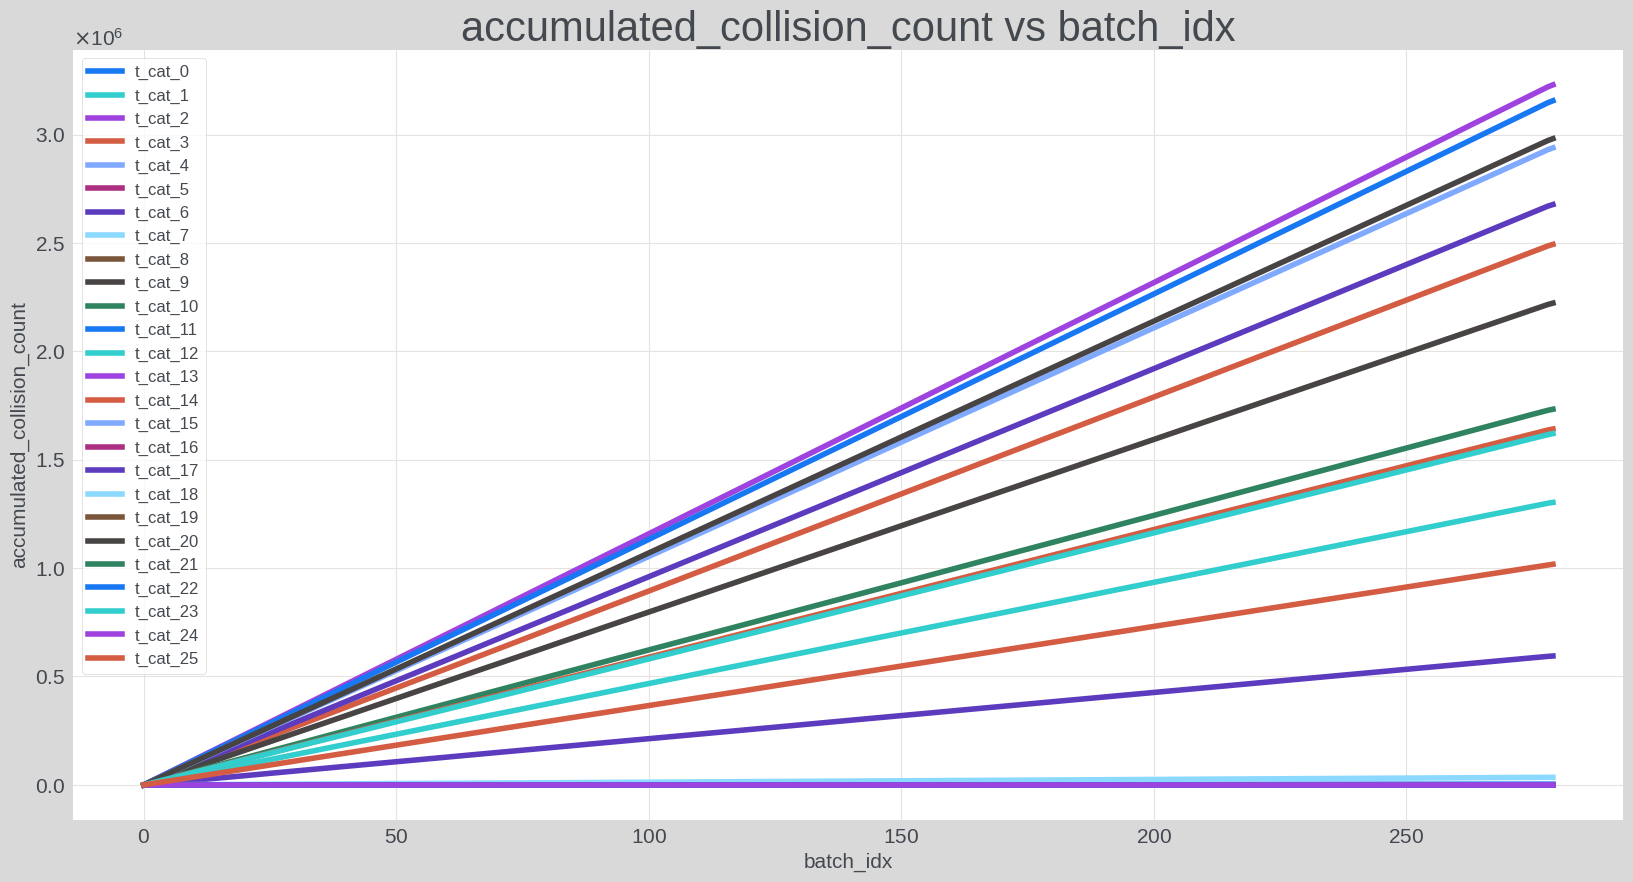

In [19]:
# plot collision count for each feature
# each feature name has a line with a different color
# the x-axis is the batch_idx, the y-axis is the accumulated_collision_count
fig = plt.figure(figsize=(20, 10))
x_list = []
y_list = []
for feature_name in feature_name_accumulated_collision_count_dict:
    x_list = list(feature_name_accumulated_collision_count_dict[feature_name].keys())
    y_list = list(feature_name_accumulated_collision_count_dict[feature_name].values())
    plt.plot(x_list, y_list, label=feature_name)
plt.xlabel("batch_idx")
plt.ylabel("accumulated_collision_count")
plt.title("accumulated_collision_count vs batch_idx")
plt.legend()
plt.show()

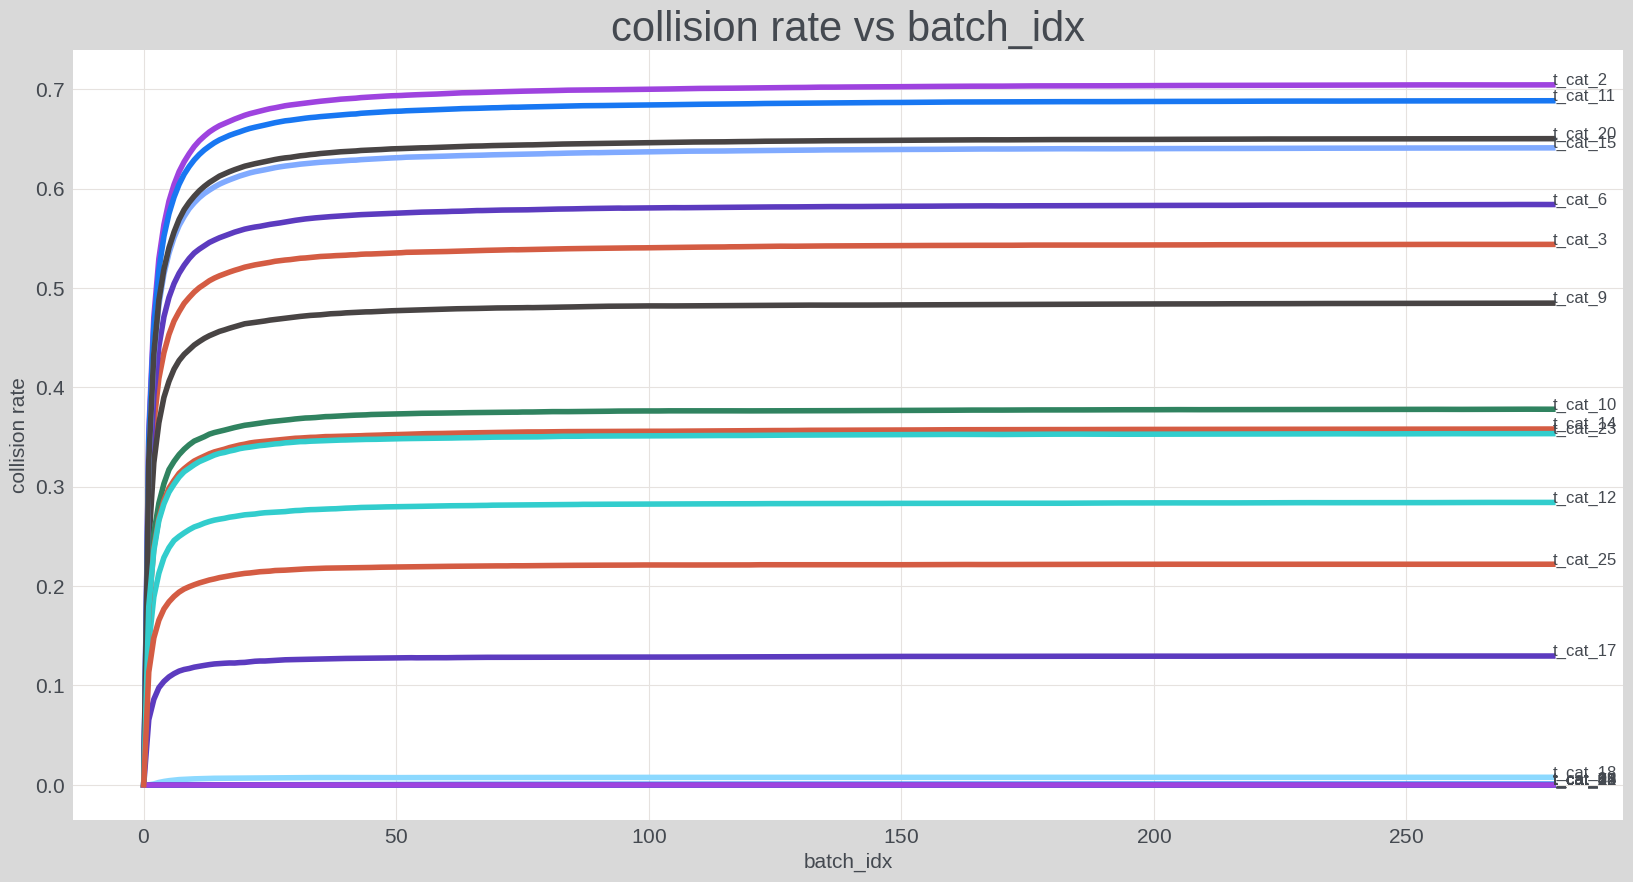

In [20]:
# plot the ratio of accumulated_collision_count / accumulated_total_count for each feature
# each feature name has a line with a different color
# the x-axis is the batch_idx, the y-axis is the ratio
fig = plt.figure(figsize=(20, 10))
x_list = []
y_list = []
for feature_name in feature_name_accumulated_collision_count_dict:
    x_list = list(feature_name_accumulated_collision_count_dict[feature_name].keys())
    y_list = [feature_name_accumulated_collision_count_dict[feature_name][x] / feature_name_accumulated_total_count_dict[feature_name][x] for x in x_list]
    plt.plot(x_list, y_list, label=feature_name)
plt.xlabel("batch_idx")
plt.ylabel("collision rate")
plt.title("collision rate vs batch_idx")
# add a text for each feature name at the last point of the line
for feature_name in feature_name_accumulated_collision_count_dict:
    x_list = list(feature_name_accumulated_collision_count_dict[feature_name].keys())
    y_list = [feature_name_accumulated_collision_count_dict[feature_name][x] / feature_name_accumulated_total_count_dict[feature_name][x] for x in x_list]
    plt.text(x_list[-1], y_list[-1], feature_name, fontsize=12)
# plt.legend()
plt.show()

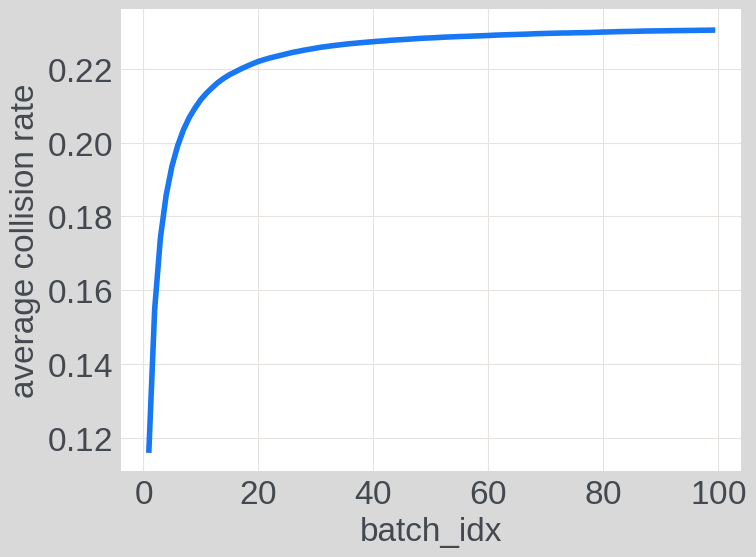

In [23]:
# plot the average ratio of accumulated_collision_count / accumulated_total_count for all the features
# the x-axis is the batch_idx, the y-axis is the ratio
fig = plt.figure(figsize=(8, 6))
font_size = 24
x_list = list(average_accumulated_collision_count_dict.keys())
y_list = list(average_accumulated_collision_count_dict.values())
plt.plot(x_list, y_list)
plt.xlabel("batch_idx", fontsize=font_size)
plt.ylabel("average collision rate", fontsize=font_size)
# plt.title("average collision rate vs batch_idx", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# save
plt.show()
# plot the ratio of accumulated_collision_count / accumulated_total_count